# Google Drive Bağlantı
Öncelikle verilere ulaşmak için drive ile colab bağlantısı kurmamız gerekiyor.

In [175]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Gerekli Kütüphanelerin eklenmesi

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

# Veri Setini Okuma

In [155]:
df = pd.read_csv('/content/drive/MyDrive/NPL_Project/language.csv')

COLAB ORTAMI DISINDA ÇALIŞILIYORSA

In [156]:
# Eğer Colab kullanmıyorsanız, aşağıdaki satırı aktif hale getirmeniz gerekir:
# df = pd.read_csv('data/language.csv')

veri seti hakkında bilgi alacağız

In [157]:
print("Veri Sayısı:", len(df))
print("Sınıflar:\n", df["Language"].value_counts())

Veri Sayısı: 10337
Sınıflar:
 Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64


# Verilerin Bölünmesi
Ben %70 e %30 Şeklinde böldüm

In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Text'], df['Language'], test_size=0.3, random_state=42, stratify=df['Language']
)

In [159]:
X = df['Text']
y = df['Language']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)

Eğitim seti boyutu: (7235,)
Test seti boyutu: (3102,)


# Veriönişlem

Dil ayırt etmek için karakter bazlı vektörleme işlemi yapıyoruz --- TF-IDF

In [160]:
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Küçük harfe çevirme + noktalama temizliği

In [161]:
def clean_text(text):
    text = text.lower()  # küçük harfe çevir
    text = re.sub(r'[^\w\s]', '', text)  # noktalama işaretlerini kaldır
    return text

df['Text'] = df['Text'].astype(str).apply(clean_text)

# Modellerin Eğitimi

Aşağıda eğitim yaparken her modelin ne kadar sürede eğitildiğinin karşılaştırmasını yapmak için bu kısımda bir dizi tanımlayacağım.

In [162]:
model_times = []


Naive Bayes Model Eğitimi

In [163]:
start = time.time() #MODELLERİN EĞİTİM SÜRELERİNİ BULMAK İÇİN BUNU EKLEDİK
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
end = time.time()
elapsed_nb = round(end - start, 2)

acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Doğruluk: {acc_nb:.4f}")

print(f"Eğitim süresi: {elapsed_nb} saniye")
model_times.append({'Model': 'Naive Bayes', 'Training Time (s)': elapsed_nb})

print(classification_report(y_test, y_pred_nb, zero_division=1))

Doğruluk: 0.8356
Eğitim süresi: 0.06 saniye
              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       165
      Danish       1.00      0.18      0.30       123
       Dutch       1.00      0.41      0.58       175
     English       0.48      1.00      0.65       435
      French       0.97      0.97      0.97       309
      German       1.00      0.12      0.21       135
       Greek       1.00      1.00      1.00       102
       Hindi       1.00      1.00      1.00        20
     Italian       1.00      0.68      0.81       217
     Kannada       1.00      1.00      1.00       101
   Malayalam       1.00      0.99      1.00       184
  Portugeese       0.99      0.90      0.94       205
     Russian       1.00      1.00      1.00       200
     Spanish       0.97      0.91      0.94       246
    Sweedish       0.90      0.82      0.86       193
       Tamil       1.00      1.00      1.00       145
     Turkish       1.00      0.80    

Logictic Regression Eğitimi

In [164]:
start = time.time()
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
end = time.time()
elapsed_lr = round(end - start, 2)

acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Doğruluk: {acc_lr:.4f}")

print(f"Eğitim süresi: {elapsed_nb} saniye")
model_times.append({'Model': 'Logistic Regression', 'Training Time (s)': elapsed_lr})

print(classification_report(y_test, y_pred_lr, zero_division=1))

Doğruluk: 0.9819
Eğitim süresi: 0.06 saniye
              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       165
      Danish       0.95      0.95      0.95       123
       Dutch       0.99      0.95      0.97       175
     English       0.96      0.99      0.98       435
      French       0.99      0.99      0.99       309
      German       0.97      0.97      0.97       135
       Greek       1.00      1.00      1.00       102
       Hindi       1.00      1.00      1.00        20
     Italian       0.97      0.97      0.97       217
     Kannada       1.00      1.00      1.00       101
   Malayalam       1.00      0.99      1.00       184
  Portugeese       0.98      0.97      0.98       205
     Russian       1.00      1.00      1.00       200
     Spanish       0.99      0.98      0.98       246
    Sweedish       0.96      0.95      0.96       193
       Tamil       1.00      1.00      1.00       145
     Turkish       0.98      0.99    

Random Forest Eğitimi

In [165]:
start = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
end = time.time()
elapsed_rf = round(end - start, 2)


acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Doğruluk: {acc_rf:.4f}")

print(f"Eğitim süresi: {elapsed_nb} saniye")
model_times.append({'Model': 'Random Forest', 'Training Time (s)': elapsed_rf})

print(classification_report(y_test, y_pred_rf, zero_division=1))

Doğruluk: 0.9726
Eğitim süresi: 0.06 saniye
              precision    recall  f1-score   support

      Arabic       0.99      1.00      0.99       165
      Danish       0.88      0.93      0.91       123
       Dutch       0.97      0.95      0.96       175
     English       0.96      0.99      0.97       435
      French       0.99      0.97      0.98       309
      German       0.99      0.96      0.97       135
       Greek       1.00      0.99      1.00       102
       Hindi       1.00      1.00      1.00        20
     Italian       0.96      0.94      0.95       217
     Kannada       1.00      1.00      1.00       101
   Malayalam       1.00      0.99      1.00       184
  Portugeese       0.98      0.94      0.96       205
     Russian       1.00      1.00      1.00       200
     Spanish       0.94      0.97      0.95       246
    Sweedish       0.95      0.94      0.95       193
       Tamil       1.00      1.00      1.00       145
     Turkish       0.97      0.98    

Linear SVC Eğitimi

In [166]:
start = time.time()
svc_model = LinearSVC()
svc_model.fit(X_train_tfidf, y_train)
y_pred_svc = svc_model.predict(X_test_tfidf)
end = time.time()
elapsed_svc = round(end - start, 2)

acc_svc = accuracy_score(y_test, y_pred_svc)
print(f"Doğruluk: {acc_svc:.4f}")

print(f"Eğitim süresi: {elapsed_svc} saniye")
model_times.append({'Model': 'Linear SVC', 'Training Time (s)': elapsed_svc})

print(classification_report(y_test, y_pred_svc, zero_division=1))

Doğruluk: 0.9877
Eğitim süresi: 0.65 saniye
              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       165
      Danish       0.95      0.96      0.96       123
       Dutch       0.99      0.99      0.99       175
     English       0.99      0.99      0.99       435
      French       0.99      0.99      0.99       309
      German       0.98      0.98      0.98       135
       Greek       1.00      1.00      1.00       102
       Hindi       1.00      1.00      1.00        20
     Italian       0.98      0.99      0.98       217
     Kannada       1.00      1.00      1.00       101
   Malayalam       1.00      0.99      1.00       184
  Portugeese       0.98      0.96      0.97       205
     Russian       1.00      1.00      1.00       200
     Spanish       0.98      0.98      0.98       246
    Sweedish       0.97      0.98      0.98       193
       Tamil       1.00      1.00      1.00       145
     Turkish       0.99      0.99    

# Modellerin Karşılaştırılması

In [167]:
print(f"Naive Bayes         : {acc_nb:.4f}")
print(f"Logistic Regression : {acc_lr:.4f}")
print(f"Random Forest       : {acc_rf:.4f}")
print(f"Linear SVC          : {acc_svc:.4f}")


Naive Bayes         : 0.8356
Logistic Regression : 0.9819
Random Forest       : 0.9726
Linear SVC          : 0.9877


In [168]:
model_metrics = []

# Her model için skorları hesapla
for name, y_pred in [
    ("Naive Bayes", y_pred_nb),
    ("Logistic Regression", y_pred_lr),
    ("Random Forest", y_pred_rf),
    ("Linear SVC", y_pred_svc)
]:
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division=1)
    model_metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })

# DataFrame ile tablo yap
df_metrics = pd.DataFrame(model_metrics)
print("\n Tüm Metrikler:\n")
print(df_metrics.round(4))


 Tüm Metrikler:

                 Model  Accuracy  Precision  Recall  F1-score
0          Naive Bayes    0.8356     0.9600  0.8105    0.8324
1  Logistic Regression    0.9819     0.9847  0.9825    0.9836
2        Random Forest    0.9726     0.9757  0.9741    0.9748
3           Linear SVC    0.9877     0.9888  0.9882    0.9885


In [169]:
df_times = pd.DataFrame(model_times)
print("MODELLERİN EĞİTİM SÜRELERİ:")
print(df_times)


MODELLERİN EĞİTİM SÜRELERİ:
                 Model  Training Time (s)
0          Naive Bayes               0.06
1  Logistic Regression              12.14
2        Random Forest              13.08
3           Linear SVC               0.65


# Görselleştirme

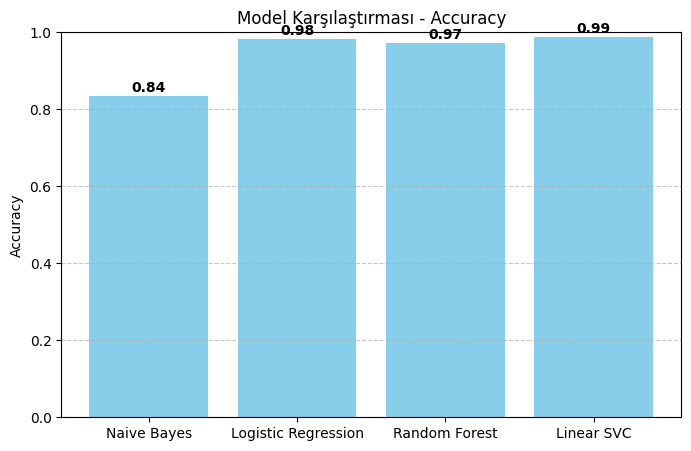

In [170]:
plt.figure(figsize=(8, 5))
plt.bar(df_metrics['Model'], df_metrics['Accuracy'], color='skyblue')
plt.title('Model Karşılaştırması - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(df_metrics['Accuracy']):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

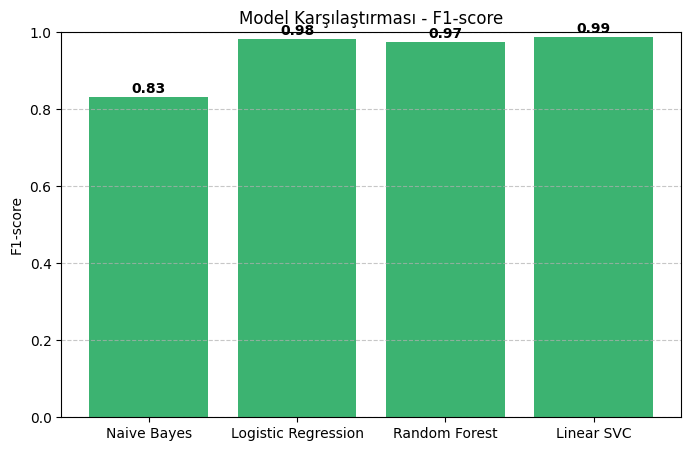

In [171]:
plt.figure(figsize=(8, 5))
plt.bar(df_metrics['Model'], df_metrics['F1-score'], color='mediumseagreen')
plt.title('Model Karşılaştırması - F1-score')
plt.ylabel('F1-score')
plt.ylim(0, 1)
for i, v in enumerate(df_metrics['F1-score']):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


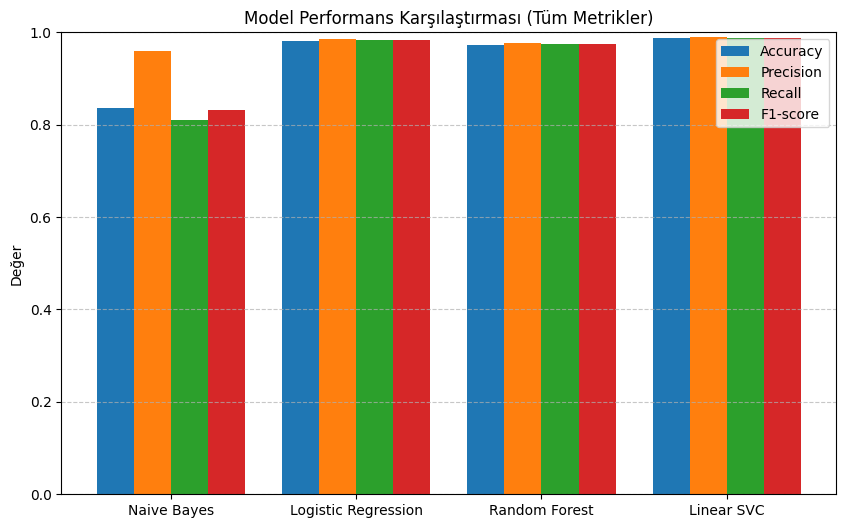

In [172]:
# Çoklu bar grafik: Accuracy, Precision, Recall, F1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(df_metrics['Model']))
bar_width = 0.2

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i*bar_width, df_metrics[metric], width=bar_width, label=metric)

plt.xticks(x + bar_width * 1.5, df_metrics['Model'])
plt.ylim(0, 1)
plt.title('Model Performans Karşılaştırması (Tüm Metrikler)')
plt.ylabel('Değer')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

EĞitim sürelerinin karşılaştırıldığı bir grafik

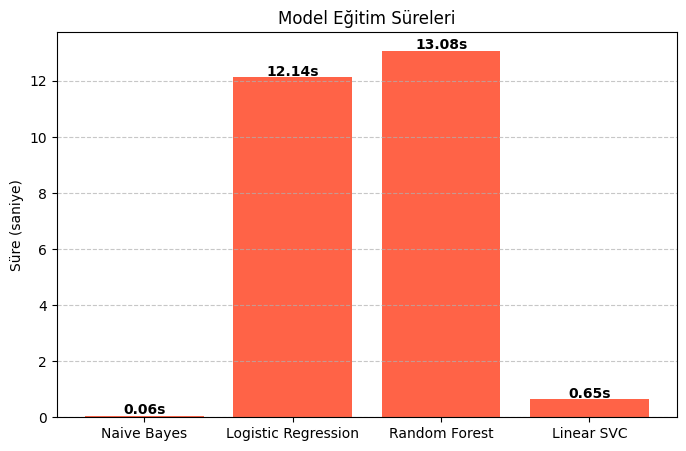

In [173]:
plt.figure(figsize=(8,5))
plt.bar(df_times['Model'], df_times['Training Time (s)'], color='tomato')
plt.title('Model Eğitim Süreleri')
plt.ylabel('Süre (saniye)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(df_times['Training Time (s)']):
    plt.text(i, v + 0.05, f"{v}s", ha='center', fontweight='bold')
plt.show()


# Kullanıcıdan Cümle Al

In [174]:
def clean_text(text):
    import re
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Kullanıcıdan cümle al
user_input = input("Bir cümle girin: ").strip()

# Temizle
cleaned_input = clean_text(user_input)

# Kelime sayısı kontrolü
kelime_sayisi = len(cleaned_input.split())

# Uyarı ver ama yine de tahmin yap
if kelime_sayisi < 7:
    print(f"Uyarı: Cümlede yalnızca {kelime_sayisi} kelime var. Dil tahmini güvenilir olmayabilir.")
    print("AMA YİNE DEEEE")

# Vektöre çevir ve tahmin et
user_vec = vectorizer.transform([cleaned_input])
prediction = svc_model.predict(user_vec)[0]
print(f"Bu cümle büyük ihtimalle **{prediction.upper()}** dilinde.")


Bir cümle girin: Deneme cümlesi. 
Uyarı: Cümlede yalnızca 2 kelime var. Dil tahmini güvenilir olmayabilir.
AMA YİNE DEEEE
Bu cümle büyük ihtimalle **TURKISH** dilinde.
